In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from scipy import linalg
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
from confusion_matrix import confusion_matrix
from sklearn.metrics import confusion_matrix as cf

import pandas as pd

In [2]:
# Load training data
train_data = pd.read_csv("../TrainingData/neodata/fault_all_5000.csv")

test_data = pd.read_csv("../ValidationData/neodata/fault_all_5000.csv")

train_data.head()

,Pdis,Psuc,T0,Tc,Tdis,Tret,Tsuc,Tsh,Tsup,CondFan,CprPower,Density,Tamb,Tset,target
0,8.079303,2.488840,-4.404951,31.675979,50.189922,4.356309,2.260622,6.665760,-1.342526,51.955327,1461.833311,5.595076,10,0,0
1,8.078940,2.489046,-4.402751,31.674398,50.183938,4.355455,2.260439,6.663373,-1.341725,51.937760,1460.990185,5.595543,10,0,0
2,8.078579,2.489252,-4.400552,31.672819,50.177960,4.354605,2.260258,6.660990,-1.340923,51.920216,1460.148281,5.596009,10,0,0
3,8.078217,2.489457,-4.398353,31.671243,50.171989,4.353758,2.260081,6.658612,-1.340119,51.902696,1459.307591,5.596476,10,0,0
4,8.077857,2.489663,-4.396156,31.669668,50.166024,4.352916,2.259908,6.656237,-1.339313,51.885198,1458.468110,5.596942,10,0,0


In [3]:
train_data = train_data[ (train_data['target'] != 8) & (train_data['target'] != 18) ]
test_data = test_data[ (test_data['target'] != 8) & (test_data['target'] != 18) ]

train_data['target'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       19, 20], dtype=int64)

Text(0.5, 1.0, 'Training data')

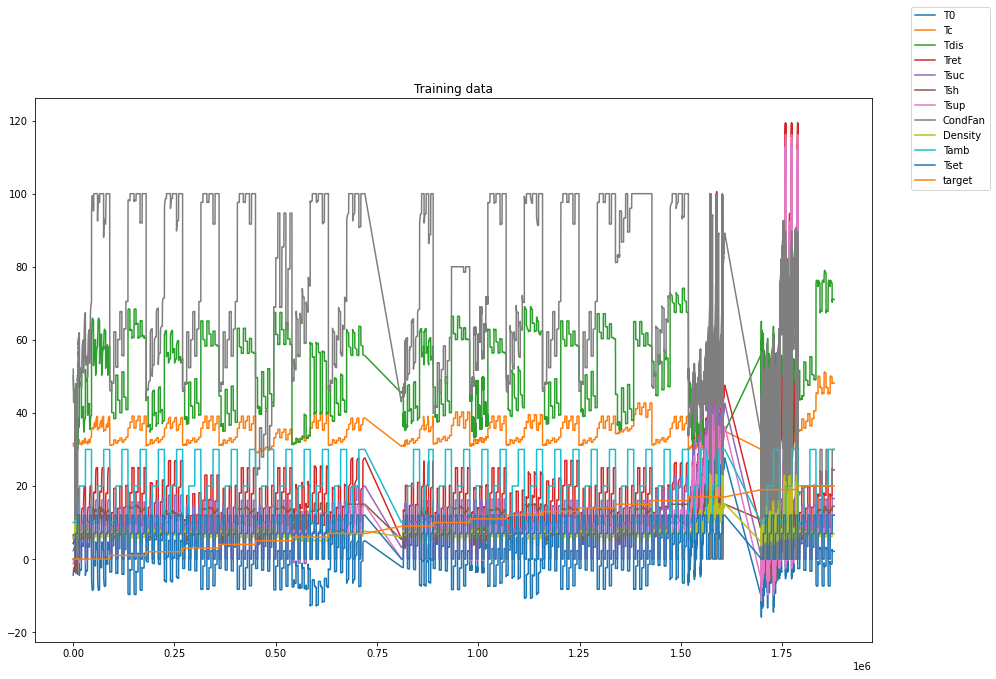

In [9]:
fig, axs = plt.subplots(figsize=(15,10))

#easier to see most data without Pdis, Psuc, CprPower
axs.plot(train_data.drop(['Pdis','Psuc','CprPower'],axis=1))
plt.legend(train_data.drop(['Pdis','Psuc','CprPower'],axis=1).keys(), bbox_to_anchor=(1.04, 1), loc="center left")
plt.title('Training data')

In [11]:
#standardization
standardize = True 

if standardize:
    #import standardization as sd
    from sklearn.preprocessing import StandardScaler

    # Normalization / conditioning
    scaler = StandardScaler()

    scaler.fit(train_data.drop('target',axis=1))
    col = train_data.columns.drop('target')
    trn = pd.DataFrame(scaler.transform(train_data.drop('target',axis=1)),columns=col)
    tst = pd.DataFrame(scaler.transform(test_data.drop('target',axis=1)),columns=col)
else:
    trn = train_data.drop('target',axis=1)
    tst = test_data.drop('target',axis=1)

targets = train_data['target'].unique().tolist()
labels_trn = train_data['target']
labels_tst = test_data['target']


drop_features = ['Pdis', 'Psuc', 'T0', 'Tsh', 'Tsup', 'CondFan', 'CprPower', 'Density','Tamb']

trn = trn.drop(drop_features,axis=1)
tst = tst.drop(drop_features,axis=1)

trn

,Tc,Tdis,Tret,Tsuc,Tset
0,-0.894161,-0.037485,-1.150405,-1.167789,-1.280617
1,-0.894594,-0.038004,-1.150478,-1.167812,-1.280617
2,-0.895026,-0.038523,-1.150551,-1.167834,-1.280617
3,-0.895458,-0.039041,-1.150624,-1.167856,-1.280617
4,-0.895889,-0.039559,-1.150696,-1.167877,-1.280617
...,...,...,...,...,...
1698709,3.604739,1.767774,0.563388,0.581748,1.160325
1698710,3.604738,1.767773,0.563388,0.581748,1.160325
1698711,3.604737,1.767772,0.563388,0.581748,1.160325
1698712,3.604736,1.767771,0.563388,0.581749,1.160325


In [11]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(7,7),activation='relu',verbose=True)

clf.fit(trn,labels_trn)

Iteration 1, loss = 0.68388451
Iteration 2, loss = 0.14093323
Iteration 3, loss = 0.07177644
Iteration 4, loss = 0.04806905
Iteration 5, loss = 0.03646364
Iteration 6, loss = 0.02928798
Iteration 7, loss = 0.02446475
Iteration 8, loss = 0.02052924
Iteration 9, loss = 0.01734591
Iteration 10, loss = 0.01490935
Iteration 11, loss = 0.01294835
Iteration 12, loss = 0.01124061
Iteration 13, loss = 0.00975812
Iteration 14, loss = 0.00844174
Iteration 15, loss = 0.00753096
Iteration 16, loss = 0.00687363
Iteration 17, loss = 0.00643072
Iteration 18, loss = 0.00611106
Iteration 19, loss = 0.00577098
Iteration 20, loss = 0.00552740
Iteration 21, loss = 0.00532012
Iteration 22, loss = 0.00513626
Iteration 23, loss = 0.00493227
Iteration 24, loss = 0.00482150
Iteration 25, loss = 0.00469320
Iteration 26, loss = 0.00462441
Iteration 27, loss = 0.00448107
Iteration 28, loss = 0.00439412
Iteration 29, loss = 0.00424842
Iteration 30, loss = 0.00419136
Iteration 31, loss = 0.00413742
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(7, 7), verbose=True)

In [12]:
import pickle

#pickle.dump(clf,open('NN_7.sav','wb'))
pickle.dump(scaler,open('NN_scl.sav','wb'))

# How it fits the training data

In [16]:
predict = clf.predict(trn)
#print("accurary: {}%".format(clf.score(trn,labels_trn)*100))

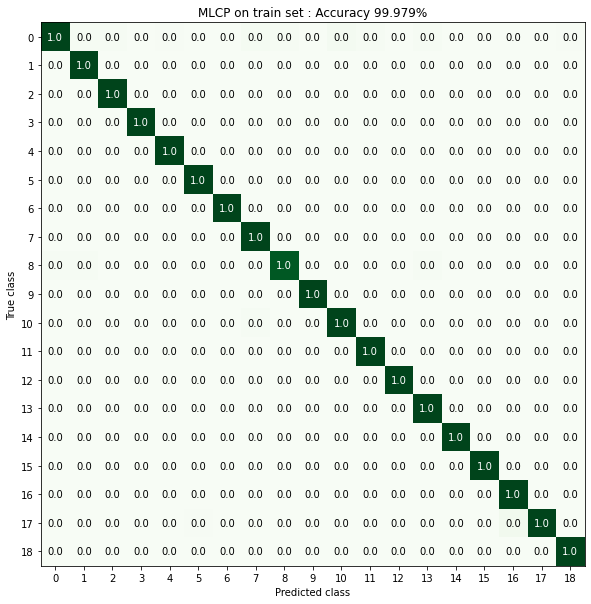

In [17]:
#plot the confusion matrix
confusion_matrix( cf(labels_trn,predict), figsize = (10,10),title='MLCP on train set')
pass

# Evaluating on test set
with different setpoint

In [18]:
predict_tst = clf.predict(tst)

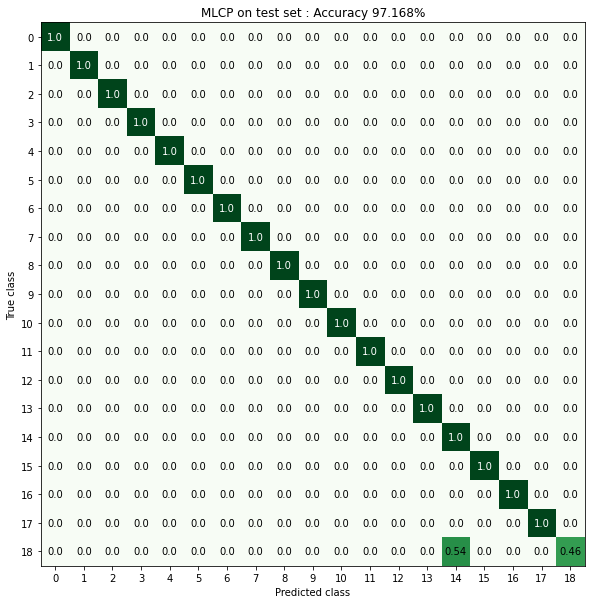

In [19]:
#plot the confusion matrix
confusion_matrix(cf(labels_tst,predict_tst), figsize = (10,10),title='MLCP on test set')
pass